# 0. HTML

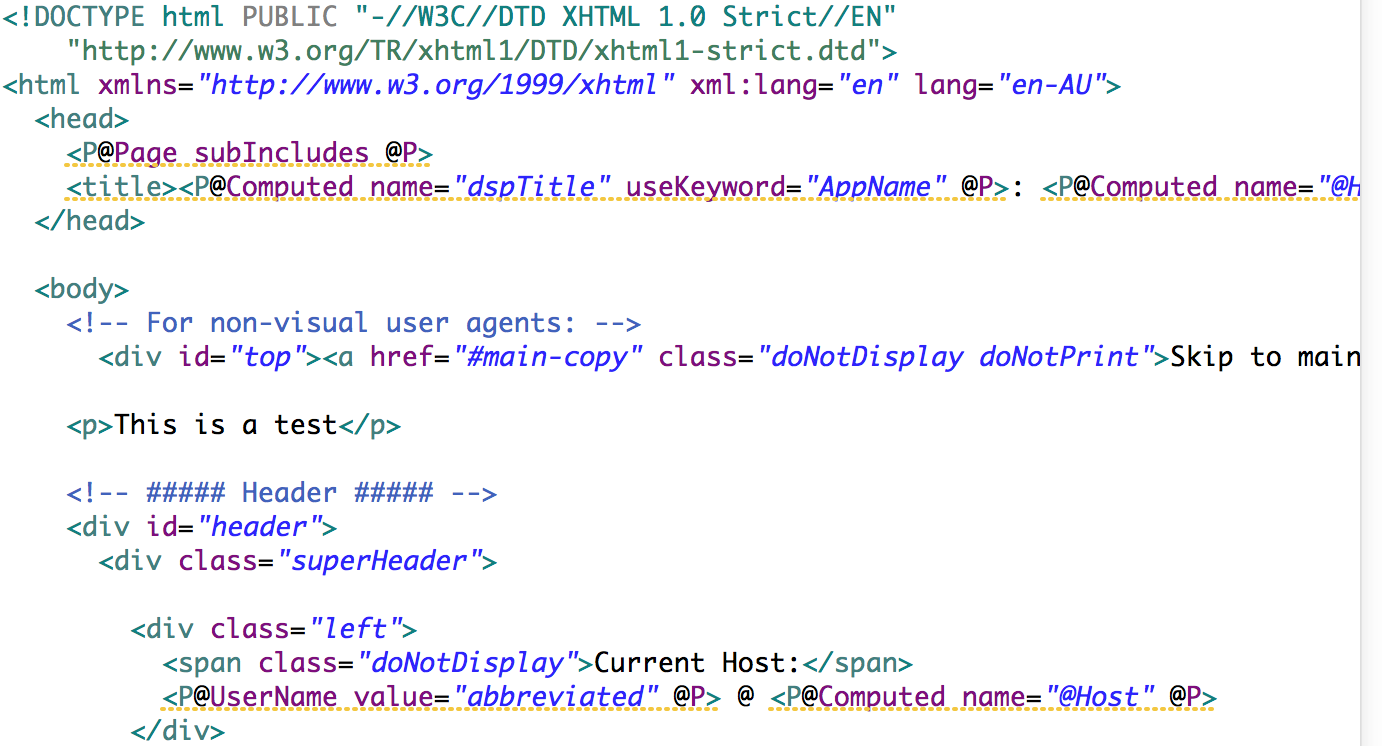

In [1]:
from IPython.display import Image
Image(filename='./images/DActu.png')

# 1. Use requests to find info in the source code

In [ ]:
#Requests (source code)
td

In [7]:
import requests

#request the website
website = requests.get("http://aissr.uva.nl/staff")
#check if has been downloaded correctly
print(website.status_code)
print(website.encoding)

#get the source code
if website.ok:
    print(website.text)



200
UTF-8
<!doctype html>
    <!--[if lt IE 8 ]><html lang="en" class="no-js ie7"><![endif]-->
    <!--[if IE 8 ]><html lang="en" class="no-js ie8"><![endif]-->
    <!--[if gt IE 8]><!--><html class="no-js" lang="en"><!--<![endif]-->
    <head>
        <meta charset="utf-8"/>

        <title>Staff - AISSR - University of Amsterdam</title>

        <meta name="viewport" content="width=device-width"/>
        <link rel="stylesheet"
              href="//static.uva.nl/css/style.css?2.07.3"
              type="text/css"/>
        <!--[if gt IE 8]><!-->
            <link rel="stylesheet"
                  href="//static.uva.nl/css/mobile.css?2.07.3"
                  type="text/css"/>
            <!--<![endif]-->
        <link rel="canonical" href="http://aissr.uva.nl/staff/staff.html"/>
            <meta http-equiv="content-language" content="en"/>
        <meta name="copyright" content="Universiteit van Amsterdam"/>
        <meta name="author" content="Universiteit van Amsterdam"/>
      

From: http://bagrow.com/ds2/LEC05_notes_2014-09-09.html

**Request codes**
* 2xx good,
* 3xx url should be redirected,
* 4xx server rejects your request,
* 5xx something is wrong with the server

In [8]:
import bs4 as bs

#read the html structure
website = requests.get("http://aissr.uva.nl/staff")
if website.ok:
    html = bs.BeautifulSoup(website.text)
    
#pretty print
print(html.prettify())




<!DOCTYPE html>
<!--[if lt IE 8 ]><html lang="en" class="no-js ie7"><![endif]-->
<!--[if IE 8 ]><html lang="en" class="no-js ie8"><![endif]-->
<!--[if gt IE 8]><!-->
<html class="no-js" lang="en">
 <!--<![endif]-->
 <head>
  <meta charset="utf-8"/>
  <title>
   Staff - AISSR - University of Amsterdam
  </title>
  <meta content="width=device-width" name="viewport"/>
  <link href="//static.uva.nl/css/style.css?2.07.3" rel="stylesheet" type="text/css"/>
  <!--[if gt IE 8]><!-->
  <link href="//static.uva.nl/css/mobile.css?2.07.3" rel="stylesheet" type="text/css"/>
  <!--<![endif]-->
  <link href="http://aissr.uva.nl/staff/staff.html" rel="canonical"/>
  <meta content="en" http-equiv="content-language"/>
  <meta content="Universiteit van Amsterdam" name="copyright"/>
  <meta content="Universiteit van Amsterdam" name="author"/>
  <meta content="en" name="language"/>
  <meta content="Staff - AISSR - University of Amsterdam" property="og:title"/>
  <link href="/apple-touch-icon.png" rel="appl

/home/javiergb/Programs/anaconda3/lib/python3.5/site-packages/bs4/__init__.py:166: UserWarning: No parser was explicitly specified, so I'm using the best available HTML parser for this system ("lxml"). This usually isn't a problem, but if you run this code on another system, or in a different virtual environment, it may use a different parser and behave differently.

To get rid of this warning, change this:

 BeautifulSoup([your markup])

to this:

 BeautifulSoup([your markup], "lxml")

  markup_type=markup_type))


In [9]:
#<li class="employeeitem with-photo">
people_in_page = html.find_all("li", { "class" : "employeeitem" })
for person in people_in_page:
    print(person)
    break
    
#<p class="contact-info">L.Aaldering@uva.nl</p>

<li class="employeeitem with-photo">
<h4>
<span class="gender">
	    Ms</span>
	L.
        (Loes)
     Aaldering<span class="titlesAfter"> MSc</span>
</h4>
<p class="contact-info">
        PhD candidate</p>
<p class="contact-info">L.Aaldering@uva.nl</p>
<img src="/binaries/thumbnail/content/gallery/personen/a/a/aaldering-l.jpg"/>
<a class="action" href="/staff/staff/staff/folder/a/a/l.aaldering/l.aaldering.html"><span class="ir">Ga naar deze medewerker</span></a>
</li>


In [10]:
people_in_page = html.find_all("li", { "class" : "employeeitem" })
for person in people_in_page:
    name = person.find("h4")
    email = person.find_all("p", { "class" : "contact-info" })[-1]
    print(name.text.split(), email.text)
    
    

['Ms', 'L.', '(Loes)', 'Aaldering', 'MSc'] L.Aaldering@uva.nl
['dr.', 'A.J.J.', '(Anna)', 'Aalten'] A.J.J.Aalten@uva.nl | T: 0652543012
['drs.', 'P.W.H.', '(Paul)', 'Aarts'] P.W.H.Aarts@uva.nl
['dr.', 'V.', 'van', 'Acker'] V.vanAcker@uva.nl
['Ms', 'T.', '(Tanja)', 'Ahlin'] T.Ahlin@uva.nl
['dr.', 'T.', '(Tjitske)', 'Akkerman'] T.Akkerman@uva.nl
['drs.', 'A.J.', '(Arjen)', 'Alberts'] A.J.Alberts@uva.nl
['Ms', 'A.', '(Anika)', 'Altaf'] A.Altaf@uva.nl
['Mr', 'I.', 'Amit'] I.Amit@uva.nl
['drs.', 'A.', '(Apostolos)', 'Andrikopoulos'] A.Andrikopoulos@uva.nl
['dr.', 'D.L.', '(Dennis)', 'Arnold'] D.L.Arnold@uva.nl
['Mr', 'R.I.M.', '(Rowan)', 'Arundel', 'MSc'] R.I.M.Arundel@uva.nl
['Mr', 'K.O.', '(Kwabena)', 'Asubonteng', 'MSc'] K.O.ASUBONTENG@uva.nl
['Ms', 'M.', '(Martha)', 'Ataa-Asantewaa', 'MSc'] M.ATAA-ASANTEWAA@uva.nl
['drs.', 'T.W.', '(Tito)', 'Bachmayer'] T.W.Bachmayer@uva.nl
['dr.', 'J.', '(Julia)', 'Bader'] J.Bader2@uva.nl | T: 0205257378
['dr.', 'E.', '(Evelyne)', 'Baillergeau'] E.Bail

## API 
Tells you how to extract the data (which url to use when calling requests, etc). We'll skip them, but if they exist they are always the easiest way to get the info

# 2. Use requests to create a crawler
- Finds in a website the links
- Follows them in an efficient way
- Count the number of times something shows up


In [12]:
from time import sleep
from random import random
from urllib.parse import urljoin
import bs4 as bs
import requests

def get_links_website(website,keyword_search):
    """
    Finds all the links in the website, and how many times the keyword was found
    """
    try: r = requests.get(website, timeout=100)
    except: 
        print("error {} in page {}".format(r.status_code,website))
        return 0,[]
    if r.ok:
        html = bs.BeautifulSoup(r.text, "lxml")
    else: 
        print(r.status_code)
        return 0,[]
    
    #Find all snapshots
    snapshots = []
    all_links = html.find_all("a", href=True)
    hits = r.text.count(keyword_search)
    return hits,all_links

def crawl_one_level(snapshot, link_base, links_snapshot_set,keyword):
    """
    get's the links of the website (link_base) and filter them, keeping the ones that stay in the domain
    """
    hits, links = get_links_website(link_base,keyword)
    for link in links:
        link_joined = urljoin(link_base, link["href"])
        if (snapshot in link_joined) and (link_joined not in links_snapshot_set):
            links_snapshot_set.add(link_joined)
    return hits, links_snapshot_set


def crawl_all_levels(snapshot,keyword):
    """
    crawls the website snapshot, without leaving the domain
    """
    #Get source code
    dict_hits = dict()
    links_snapshot_set_old = set([snapshot])
    new_links = set([snapshot])
    while len(new_links) > 0:
        for i, link in enumerate(new_links):
            sleep(random()*2)            
            hits, links_snapshot_set_new = crawl_one_level(snapshot, link,links_snapshot_set_old.copy(),keyword)
            print("{0}: Link: {1} has the word \"{2}\" {3} times".format(i, link,keyword,hits))
            dict_hits.update({link: hits})
        new_links = links_snapshot_set_new - links_snapshot_set_old
        print("\nNew links to follow: ", len(new_links))
        links_snapshot_set_old = links_snapshot_set_old | links_snapshot_set_new
        
    return dict_hits

def BFS_keyword(website,keyword,filename):
    """
    calls the script and saves the results to a file
    """
    dict_hits = crawl_all_levels(website,keyword)
    print(dict_hits)
    with open(filename, "w+") as f:
        f.write("link" + "\t" + "number_hits" + "\n")
        for link in dict_hits:
            f.write("{0}\t{1}\n".format(link,dict_hits[link]))

0: Link: https://www.amnesty.org/en/ has the word "campaign" 12 times

New links to follow:  32
0: Link: https://www.amnesty.org/en/about-us/contact/ has the word "campaign" 10 times
1: Link: https://www.amnesty.org/en/latest/news/2016/01/video-banished-and-dispossessed-in-northern-iraq/ has the word "campaign" 11 times
2: Link: https://www.amnesty.org/en/latest/campaigns/ has the word "campaign" 41 times
3: Link: https://www.amnesty.org/en/about-us/permissions/ has the word "campaign" 9 times
4: Link: https://www.amnesty.org/en/get-involved/volunteer/ has the word "campaign" 0 times
5: Link: https://www.amnesty.org/en/about-us/how-were-run/ has the word "campaign" 9 times
6: Link: https://www.amnesty.org/en/about-us/cookie-statement/ has the word "campaign" 9 times
7: Link: https://www.amnesty.org/en/human-rights-education/ has the word "campaign" 12 times
8: Link: https://www.amnesty.org/en/who-we-are/jobs-and-internships/ has the word "campaign" 0 times
9: Link: https://www.amnesty.

# 2. Use requests to download files
- Download files
- Make a couple of plots

In [13]:
#import from another another notebook
import pycountry
list(pycountry.countries)

In [14]:
#Method 1
#http://data.worldbank.org/country/afghanistan
from urllib.request import urlretrieve

#get the ISO-3 code of all countries
countries_world = []
for country in list(pycountry.countries):
    countries_world.append(country.alpha3)

#download the worldbank data of the first three countries of the list
for country in countries_world[:3]:
    print(country)
    url = "http://api.worldbank.org/v2/en/country/{0}?downloadformat=csv".format(country.lower())
    urlretrieve(url,"./data/{0}.zip".format(country))

AFG
ALA
ALB


In [15]:
##Finds the code of the netherlands

#docs: http://wbdata.readthedocs.org/en/latest/
import wbdata
print(wbdata.search_countries("Nether"))



NLD	Netherlands
None


In [21]:
string1 = "d\"ads"

print(string1)

d"ads


In [16]:
#Finds the indicator code for gdp per capita growth
print(wbdata.search_indicators("gdp per capita growth"))

NV.AGR.PCAP.KD.ZG	Real agricultural GDP per capita growth rate (%)
NY.GDP.PCAP.KD.ZG	GDP per capita growth (annual %)
None


In [23]:
from pprint import pprint
some_indicator = wbdata.get_data("NY.GDP.PCAP.KD.ZG", country="NLD")
#List of dictionaries
pprint(some_indicator)


[{'country': {'id': 'NL', 'value': 'Netherlands'},
  'date': '2015',
  'decimal': '1',
  'indicator': {'id': 'NY.GDP.PCAP.KD.ZG',
                'value': 'GDP per capita growth (annual %)'},
  'value': None},
 {'country': {'id': 'NL', 'value': 'Netherlands'},
  'date': '2014',
  'decimal': '1',
  'indicator': {'id': 'NY.GDP.PCAP.KD.ZG',
                'value': 'GDP per capita growth (annual %)'},
  'value': '0.712958828522318'},
 {'country': {'id': 'NL', 'value': 'Netherlands'},
  'date': '2013',
  'decimal': '1',
  'indicator': {'id': 'NY.GDP.PCAP.KD.ZG',
                'value': 'GDP per capita growth (annual %)'},
  'value': '-0.788306212065862'},
 {'country': {'id': 'NL', 'value': 'Netherlands'},
  'date': '2012',
  'decimal': '1',
  'indicator': {'id': 'NY.GDP.PCAP.KD.ZG',
                'value': 'GDP per capita growth (annual %)'},
  'value': '-1.42250418739636'},
 {'country': {'id': 'NL', 'value': 'Netherlands'},
  'date': '2011',
  'decimal': '1',
  'indicator': {'id': 'NY.G

In [24]:

print(some_indicator[1]["value"])

0.712958828522318


# 3. Use Selenium

In [ ]:
#XPATH: Identify the elements in the website

In [25]:
from selenium import webdriver
import os

## Open firefox, telling it to download csv and zip files instead of asking (otherwise bad things happen)
fp = webdriver.FirefoxProfile()
fp.set_preference("browser.download.folderList",2)
fp.set_preference("browser.download.manager.showWhenStarting",False)
fp.set_preference("browser.download.dir",os.getcwd())
fp.set_preference("browser.helperApps.neverAsk.saveToDisk","text/csv")
fp.set_preference("browser.helperApps.neverAsk.saveToDisk","application/zip")

driver = webdriver.Firefox(firefox_profile=fp)

In [26]:
#Navigate
driver.get("https://www.google.com")

Step 1: Right botton: Inspect
Step 2: Copy xpath

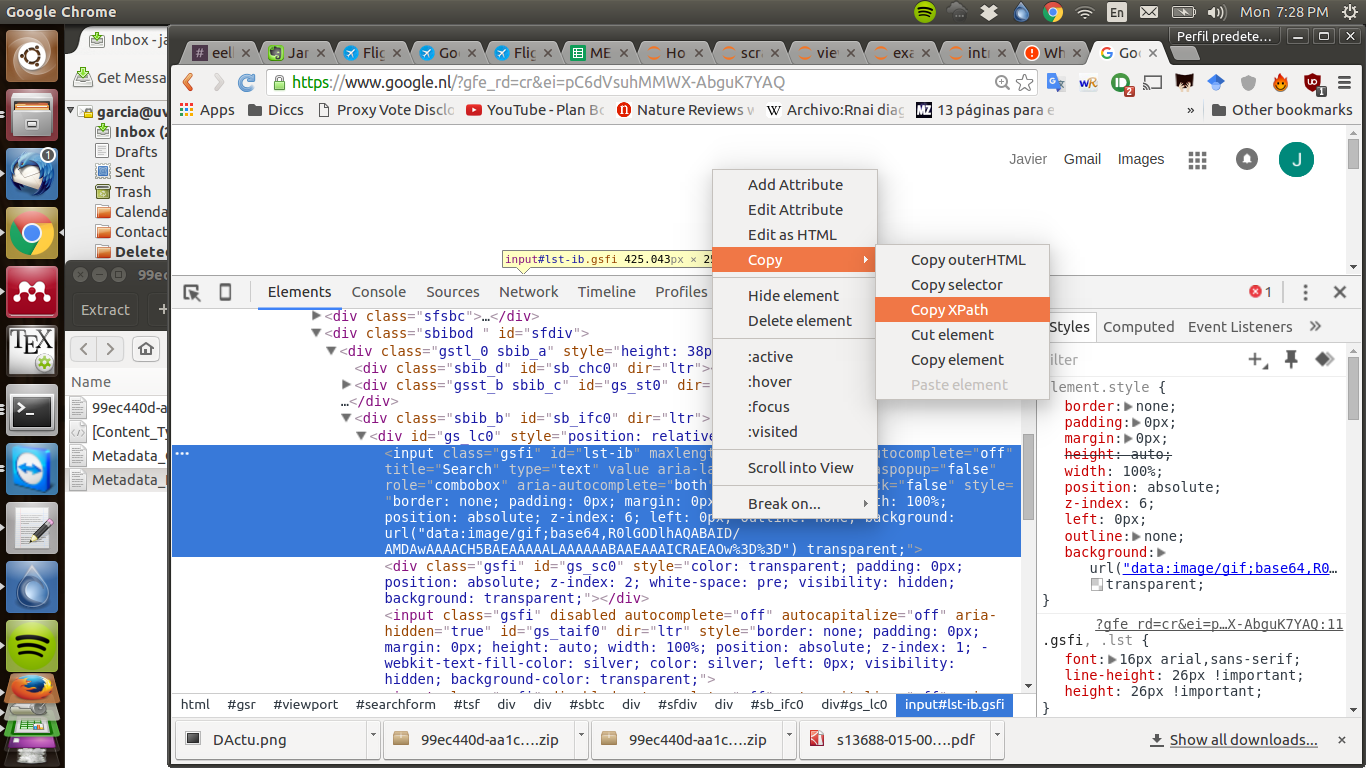

In [159]:
Image(filename='./images/xpath.png')

In [27]:
#Select item
element = driver.find_element_by_xpath('//*[@id="lst-ib"]')

In [28]:
#Send keys
element.clear()
element.send_keys("worldbank\n")

In [29]:
#Click

element = driver.find_element_by_xpath('//*[@id="rso"]/div[1]/div[1]/div/h3/a').click()


In [34]:
driver.get("http://www.worldbank.org/")


In [35]:
element = driver.find_element_by_xpath('//*[@id="hf_header_wrapper"]/div/ul[2]/li[3]/a').click()

In [36]:
element = driver.find_element_by_xpath('//*[@id="block-datafinder_settings-intro"]/div/div/div[2]/ul/li[1]/a/strong').click()


In [37]:
element = driver.find_element_by_xpath('//*[@id="block-views-countries-block_1"]/div/div/div/table/tbody/tr[1]/td[1]/div/div/span/span/a').click()



In [38]:
##Beware of elements not visible (because you need to go with the mouse over somehting)
element = driver.find_element_by_xpath('//*[@id="data-browser"]/ul/li[2]/span/ul/li[3]/a').click()




ElementNotVisibleException: Message: Element is not currently visible and so may not be interacted with
Stacktrace:
    at fxdriver.preconditions.visible (file:///tmp/tmp3j04wc9s/extensions/fxdriver@googlecode.com/components/command-processor.js:9997)
    at DelayedCommand.prototype.checkPreconditions_ (file:///tmp/tmp3j04wc9s/extensions/fxdriver@googlecode.com/components/command-processor.js:12534)
    at DelayedCommand.prototype.executeInternal_/h (file:///tmp/tmp3j04wc9s/extensions/fxdriver@googlecode.com/components/command-processor.js:12551)
    at DelayedCommand.prototype.executeInternal_ (file:///tmp/tmp3j04wc9s/extensions/fxdriver@googlecode.com/components/command-processor.js:12556)
    at DelayedCommand.prototype.execute/< (file:///tmp/tmp3j04wc9s/extensions/fxdriver@googlecode.com/components/command-processor.js:12498)

In [39]:
element = driver.find_element_by_xpath('//*[@id="data-browser"]/ul/li[2]/span').click()



In [40]:
element = driver.find_element_by_xpath('//*[@id="data-browser"]/ul/li[2]/span/ul/li[3]/a').click()